<strong>FIRST OF ALL IMPORT ALL THE LIBRARIES THAT WE NEED DURING OUR VISULIZATION.
BASIC LIBRARY THAT WE NEED ARE:
1.NUMPY:NUMERICAL PYTHON FOR NUMERIC CALCULATION    
    
2.MATLPLOTLIB : PLOTTING OF GRAPHS AND PLOTTING IS DONE USING It
        
3.SEABORN : EXTENSION OF MATLPLOTLIB GIVES US WIDE RANGE OF PLOTING EXPERIENCE

4.MATH : FOR MATHEMATICAL CALCULATION</strong>

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline

<font color='green'>Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.</font>

HERE WE ARE READING THE DATASET USING PANDA LIBRARY

In [273]:
df=pd.read_csv("aids.csv")
df.head(5)

,Unnamed: 0,year,quarter,delay,dud,time,y
0,1,1983,3,0,0,1,2
1,2,1983,3,2,0,1,6
2,3,1983,3,5,0,1,0
3,4,1983,3,8,0,1,1
4,5,1983,3,11,0,1,1


<font color ='red'>LETS UNDERSTAND THE DATABASE:</font>


THE FOLLOWING DATASET IS ABOUT HOW THE AIDS REPORTING IN A PARTICULAR COUNTRY(HERE ENGLAND AND WALES)
HAS DECREASED WITH YEAR, QAUTER, TIME, ETC. LETS NOW ANALYSE IT AND APPLY OUR ALGORITHM

AS ABOVE ALGORTHM SAYS ONLY SINGLE HIGHER INFLUENCING FEATURE IS SELECTED 
FROM THE DATABASE WE WILL SEE


PLOTS BETWEEN DIFFERENT FEATURES(INDEPENDENT VARIABLE) AND DEPENDENT VARIABLE(HERE 'Y') WHICH IS 
INFLUINCING Y MOST

LETS CHECK ANY MISSING VALUES ARE THERE OR NOT IN OUR DATA SET USING HEATMAP UNDER SEABORN LIBRARY

In [274]:
df=df.loc[:,~df.columns.str.contains('^Unnamed')]   #Removing the unnamed cloumn we dont actually need it
df

,year,quarter,delay,dud,time,y
0,1983,3,0,0,1,2
1,1983,3,2,0,1,6
2,1983,3,5,0,1,0
3,1983,3,8,0,1,1
4,1983,3,11,0,1,1
5,1983,3,14,0,1,0
6,1983,3,17,0,1,0
7,1983,3,20,0,1,1
8,1983,3,23,0,1,0
9,1983,3,26,0,1,0


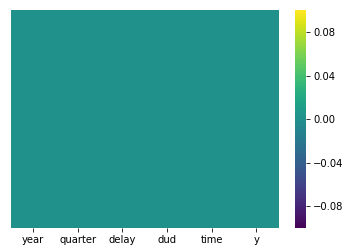

In [275]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')#Result shows no null value

In [276]:
df.isnull().sum()#all should be zero we dont want any null values

year       0
quarter    0
delay      0
dud        0
time       0
y          0
dtype: int64

<strong><font color='blue'>WE NOW DEFINE A COUNT PLOT TO SEE THE VARIATION IN THE DEPENDENT VARIABLE THAT IS WHAT ARE ITS DIFFERENT 
POSSIBLE VALUES AND WHAT IS THERE INDIVIDUAL COUNT=======></font></strong>

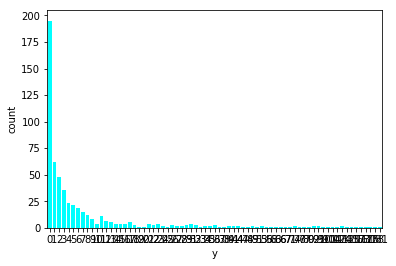

In [277]:
sns.countplot(x='y',data=df,color='cyan',saturation=1)#we see more 0's or its density is more

WE NOW CHECK WHICH FACOR AFFECTS MOST OUR DEPENDENT VARIABLE

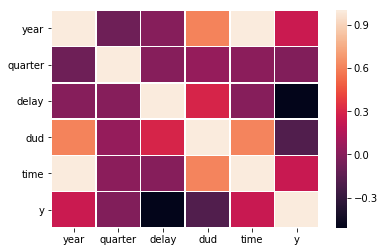

In [278]:
sns.heatmap(df.corr(), linewidths=.5)#Compute pairwise correlation of columns, excluding NA/null values.

In [279]:
print("From the Above plot we can beautifully imagine how 'year' and time are strongly correlated to other feaures \n and the it is the factor affecting 'y' most\n with the probiblity more than 0.6")

From the Above plot we can beautifully imagine how 'year' and time are strongly correlated to other feaures 
 and the it is the factor affecting 'y' most
 with the probiblity more than 0.6


HERE WE SEE BOTH TIME AND YEAR STRONGLY AFFECT OUR REQUIRED PARAMETER 'Y' SO WE TAKE HISTOGRAM AND BOXPLOT PLOTS TO ANALYSE IT FURTHER AND CHOOSE THE BEST FEATURE FROM THEM

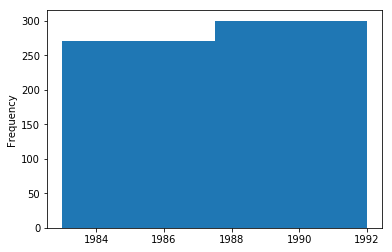

In [280]:
df["year"].plot.hist(by='y',bins=2)

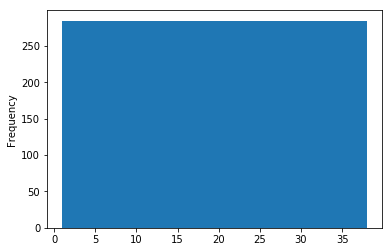

In [281]:
df["time"].plot.hist(by='y',bins=2)

<strong><font color='magenta'>we have seen that almost both the histos are same but the year one is more predictible as it reach 300 in frequency but time didnt so we choose year as our full data set's feature</font></strong>

In [282]:
#PREPARING ALL THE CORRESPONDING X AND Y

x=np.matrix((df.iloc[:,0]).astype(float).values.tolist())#CONTAINS ALL THE VALUES OF ROWS UNDER COLUMN YEAR
y=np.matrix((df.iloc[:,1]).astype(float).values.tolist())#CONTAINS ALL THE CORRESPONDIG VALUE OF Y

In [283]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [284]:
print(x,y,end="")

[[1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1983.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1984.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 [1985.]
 

<font color='red'>Divide all the datas into traing and testing data</font>

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.17,random_state=0)

In [287]:
from sklearn.linear_model import LinearRegression

In [288]:
model=LinearRegression()

In [289]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [290]:
prediction=model.predict(X_test)

In [298]:
print(model.coef_)#regression coeficient

[[-0.02745295]]


In [299]:
print(model.intercept_)#regression intercept

[57.11918255]


In [304]:
X_test=np.array(X_test)
X_train=np.array(X_train)
y_train=np.array(y_train)

In [305]:
x[:,1:200]

matrix([], shape=(570, 0), dtype=float64)

# PLOTTING OF LINEAR REGRESSION MODEL 

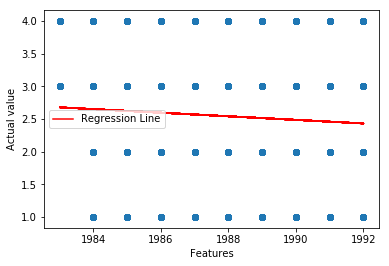

1.113483317222237


In [306]:
plt.scatter(X_train,y_train)
plt.plot(X_test,prediction,color='red',label="Regression Line")
plt.ylabel('Actual value')
plt.xlabel('Features')
plt.legend()
plt.show()

print(mean_squared_error(prediction, y_test))

<center><strong><font color='blue'>Prepared by----></font></strong><strong><font color='red'>Arijeet Mukherjee</font></strong></center>